In [112]:
# import the considered libraries
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns

In [113]:
# converting the csv to a dataframe
df=pd.read_csv(r"D:\datasets2\salaries2.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [114]:
# encoding the categorical data to numerical
df_encoded=pd.get_dummies(df,dtype=int)
df_encoded

,salary_more_then_100k,company_abc pharma,company_facebook,company_google,job_business manager,job_computer programmer,job_sales executive,degree_bachelors,degree_masters
0,0,0,0,1,0,0,1,1,0
1,0,0,0,1,0,0,1,0,1
2,1,0,0,1,1,0,0,1,0
3,1,0,0,1,1,0,0,0,1
4,0,0,0,1,0,1,0,1,0
5,1,0,0,1,0,1,0,0,1
6,0,1,0,0,0,0,1,0,1
7,0,1,0,0,0,1,0,1,0
8,0,1,0,0,1,0,0,1,0
9,1,1,0,0,1,0,0,0,1


In [115]:
# creating the featured datafrome and target variable
X=df_encoded.iloc[:,1:]
y=df_encoded.iloc[:,0]

In [116]:
X

,company_abc pharma,company_facebook,company_google,job_business manager,job_computer programmer,job_sales executive,degree_bachelors,degree_masters
0,0,0,1,0,0,1,1,0
1,0,0,1,0,0,1,0,1
2,0,0,1,1,0,0,1,0
3,0,0,1,1,0,0,0,1
4,0,0,1,0,1,0,1,0
5,0,0,1,0,1,0,0,1
6,1,0,0,0,0,1,0,1
7,1,0,0,0,1,0,1,0
8,1,0,0,1,0,0,1,0
9,1,0,0,1,0,0,0,1


In [117]:
# importing the decision tree algo
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=3)
model.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [118]:
# getting the depth of the tree

model.get_depth()

3

In [119]:
# getting the feature importance
model.feature_importances_

array([0.        , 0.52258065, 0.        , 0.31612903, 0.        ,
       0.        , 0.06451613, 0.09677419])

In [120]:
# telling the max features used in the model
print(model.max_features)

None


In [121]:
# minimum samples in the leaf
model.min_samples_leaf

1

In [122]:
# minimum samples to split the node
model.min_samples_split

2

In [123]:
# getting the predictions and telling the accuracy score
predictions=model.predict(X)
print(accuracy_score(predictions,y))

0.875


In [124]:
# converting the titanic dataset into dataframe using read_csv function
df2=pd.read_csv(r"D:\datasets2\titanic_train.csv")
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [125]:
# checking the null values in the dataframe
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [126]:
# droping the irrelevant features in the dataset
df2.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],inplace=True,axis=1)

In [127]:
# mapping the sex feature from male and female to 0 and 1 respectively
df2['Sex']=df2['Sex'].replace({'male':0,'female':1})

In [128]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,NaN,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


In [129]:
# filling the age columns  with the median of the age column
df2['Age']=df2['Age'].fillna(df2['Age'].median())

In [130]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,28.0,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


<Axes: >

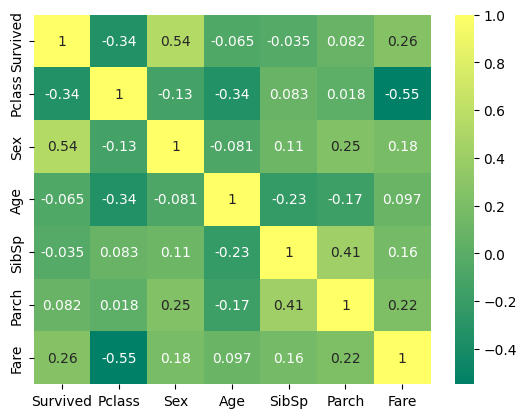

In [131]:
# showing the correlation between different variables using heat map
correlation=df2.corr()
sns.heatmap(data=correlation,annot=True,cmap='summer')

In [132]:
# showing the correlaton between independent variables and target variable in a sorted manner
correlation_by_survived=correlation['Survived'].sort_values(ascending=True)
correlation_by_survived

Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

In [136]:
# dividing the dataset into target feature and independent variables
x=df2.iloc[:,1:]
y=df2.iloc[:,0]

In [138]:
# scaling the features in dataset using the min_max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x[['Pclass','Sex','Age','SibSp','Parch','Fare']]=scaler.fit_transform(x)
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,0.0,0.271174,0.125,0.000000,0.014151
1,0.0,1.0,0.472229,0.125,0.000000,0.139136
2,1.0,1.0,0.321438,0.000,0.000000,0.015469
3,0.0,1.0,0.434531,0.125,0.000000,0.103644
4,1.0,0.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...,...
886,0.5,0.0,0.334004,0.000,0.000000,0.025374
887,0.0,1.0,0.233476,0.000,0.000000,0.058556
888,1.0,1.0,0.346569,0.125,0.333333,0.045771
889,0.0,0.0,0.321438,0.000,0.000000,0.058556


In [139]:
# dividing the dataset into train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [140]:
# using the decision tress algo for predicting the outcome
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [141]:
# predictions from the model using the decision trees algo
prediction_train=model2.predict(xtrain)
prediction_test=model2.predict(xtest)

In [142]:
# importing different evaluating algos fom the sklearn.metrics
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score

In [143]:
# printing the accuracy score ,f1_score,precision score,recall score and their overall summary in the form of claasification report 
print("Model's accuracy: ",accuracy_score(ytest,prediction_test))
print("Model f1_score: ",f1_score(ytest,prediction_test))
print("Model precision_score: ",precision_score(ytest,prediction_test))
print("Model recall_score: ",recall_score(ytest,prediction_test))
print('classification report: ',classification_report(ytest,prediction_test))

Model's accuracy:  0.7486033519553073
Model f1_score:  0.6938775510204082
Model precision_score:  0.6986301369863014
Model recall_score:  0.6891891891891891
classification report:                precision    recall  f1-score   support

           0       0.78      0.79      0.79       105
           1       0.70      0.69      0.69        74

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179

